# Simulation 8

See README.md for a description.

### Importing libraries

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import joblib
import time
import datetime
from tqdm import tqdm

import bandit as bdt
import agents as agt

In [2]:
savestats = False

### Parameters for the simulations

In [3]:
n_episodes = 1000
n_trials = 500

### Parameters for the settings

In [4]:
def setting1():
    # N(0,1), N(0.2,1), N(0,1), ..., N(0,1) 
    n_arms = 10
    means = np.zeros(n_arms)
    means[2] = 0.2
    variances = np.ones(n_arms);
    
    bandit = bdt.GaussianBandit(n_arms)
    bandit.initialize_fixed_reward_distributions(means,variances)
    return n_arms, bandit

def setting2():
    # N(0,1), N(0.2,1)
    n_arms = 2
    means = np.zeros(n_arms)
    means[1] = 0.2
    variances = np.ones(n_arms);
    
    bandit = bdt.GaussianBandit(n_arms)
    bandit.initialize_fixed_reward_distributions(means,variances)
    return n_arms, bandit

def setting3():
    # N(0,1), N(10,1), N(0,1), ..., N(0,1) 
    n_arms = 10
    means = np.zeros(n_arms)
    means[2] = 10
    variances = np.ones(n_arms);
    
    bandit = bdt.GaussianBandit(n_arms)
    bandit.initialize_fixed_reward_distributions(means,variances)
    return n_arms, bandit

def setting4():
    # N(0,5), N(2,5), N(0,5), ..., N(0,5) 
    n_arms = 10
    means = np.zeros(n_arms)
    means[2] = 2
    variances = np.ones(n_arms)*5;
    
    bandit = bdt.GaussianBandit(n_arms)
    bandit.initialize_fixed_reward_distributions(means,variances)
    return n_arms, bandit

settings = [setting1, setting2, setting3, setting4]
label_settings = ['Sc.1', 'Sc.2', 'Sc.3', 'Sc.4']
n_settings = len(settings)

### Parameters for the agents

In [5]:
verbose = False

def agentEps(bandit, n_arms, params):
    agent = agt.Agent_epsilon(bandit, n_arms, params[0])
    agent.initialize_Q_zeros()
    return agent

def agentUCB(bandit, n_arms, params):
    agent = agt.Agent_UCB(bandit, n_arms, params[0])
    agent.initialize_Q_zeros()
    return agent

def agentSL_avg(bandit, n_arms, params):
    agent = agt.Agent_SubjectiveEvidential_avgreward(bandit, n_arms)
    agent.initialize_empty_opinion()
    return agent

def agentSL_max(bandit, n_arms, params):
    agent = agt.Agent_SubjectiveEvidential_maxreward(bandit, n_arms)
    agent.initialize_empty_opinion()
    return agent

def agentSL_maxs(bandit, n_arms, params):
    agent = agt.Agent_SubjectiveEvidential_maxrewardscaled(bandit, n_arms, params[0])
    agent.initialize_empty_opinion()
    return agent

def agentSL_maxs2(bandit, n_arms, params):
    agent = agt.Agent_SubjectiveEvidential_maxreward2scaled(bandit, n_arms, params)
    agent.initialize_empty_opinion()
    return agent
        
agents = [agentEps, agentUCB, agentSL_avg, agentSL_max, agentSL_maxs, agentSL_maxs]
label_agents = ['Epsilon', 'UCB', 'SL(avg)', 'SL(max)', 'SL(maxs)', 'SL(maxs2)']
n_agents = len(agents)

eps = 0.1
c = 2
eta = .5
agent_params = [[eps], [c], [eta], [eta], [eta], [eta]]

### Statistics to collect

In [6]:
optactions = np.zeros((n_settings, n_agents, n_trials,n_episodes))
totuncertainties = np.zeros((n_settings, n_agents, n_trials,n_episodes))
epuncertainties = np.zeros((n_settings, n_agents, n_trials,n_episodes))

### Simulations

In [7]:
for i,s in enumerate(settings):

    for t in tqdm(range(n_trials)):
        n_arms, bandit = s()
        optimal_action = bandit.get_optimal_action()

        if(verbose): print('Levers means: {0}'.format(bandit.means))
        if(verbose): print('Optimal action: {0}'.format(optimal_action))

        for j,a in enumerate(agents):

            agent = a(bandit, n_arms, agent_params[j])
            for e in range(n_episodes):   
                action,reward = agent.run()
                totuncertainties[i,j,t,e] = agent.get_total_uncertainty()
                epuncertainties[i,j,t,e] = agent.get_epistemic_uncertainty()
                if(action==optimal_action): optactions[i,j,t,e]=1

  0%|          | 0/500 [00:00<?, ?it/s]/home/fmzennaro/eclipse-workspace/ReinforcementLearning3/bandits_wuml/agents.py:68: RuntimeWarning: divide by zero encountered in log
  a = self.Q + self.c * np.sqrt( np.log(np.sum(self.steps)) / self.steps  )
/home/fmzennaro/eclipse-workspace/ReinforcementLearning3/bandits_wuml/agents.py:68: RuntimeWarning: invalid value encountered in sqrt
  a = self.Q + self.c * np.sqrt( np.log(np.sum(self.steps)) / self.steps  )
/home/fmzennaro/eclipse-workspace/ReinforcementLearning3/bandits_wuml/agents.py:68: RuntimeWarning: invalid value encountered in true_divide
  a = self.Q + self.c * np.sqrt( np.log(np.sum(self.steps)) / self.steps  )
/home/fmzennaro/eclipse-workspace/ReinforcementLearning3/bandits_wuml/agents.py:68: RuntimeWarning: divide by zero encountered in true_divide
  a = self.Q + self.c * np.sqrt( np.log(np.sum(self.steps)) / self.steps  )
/home/fmzennaro/eclipse-workspace/ReinforcementLearning3/bandits_wuml/agents.py:153: RuntimeWarning: inval

### Saving results

In [8]:
if(True):
    timestamp = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
    joblib.dump(optactions,'sim8_optactions_'+timestamp+'.pkl')
    joblib.dump(totuncertainties,'sim8_totuncertainties_'+timestamp+'.pkl')
    joblib.dump(epuncertainties,'sim8_epuncertainties_'+timestamp+'.pkl')

### Plotting results

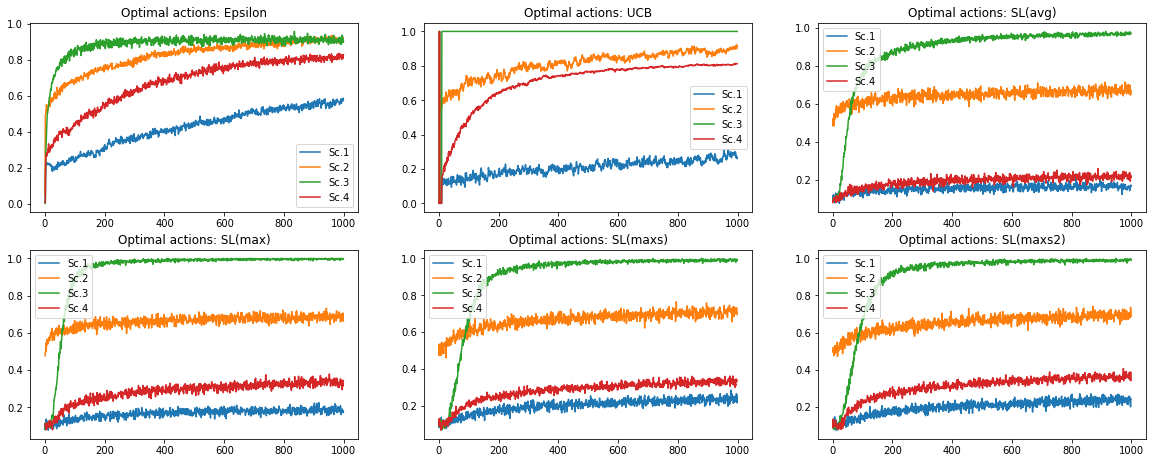

In [9]:
plt.figure(figsize=(20,16))

for j in range(n_agents):
    plt.subplot(4,3,j+1)
    for i in range(n_settings):
        plt.plot(np.arange(n_episodes),np.sum(optactions[i,j,:,:],axis=0)/np.float(n_trials), label=label_settings[i])
    plt.legend()
    plt.title('Optimal actions: {0}'.format(label_agents[j]))

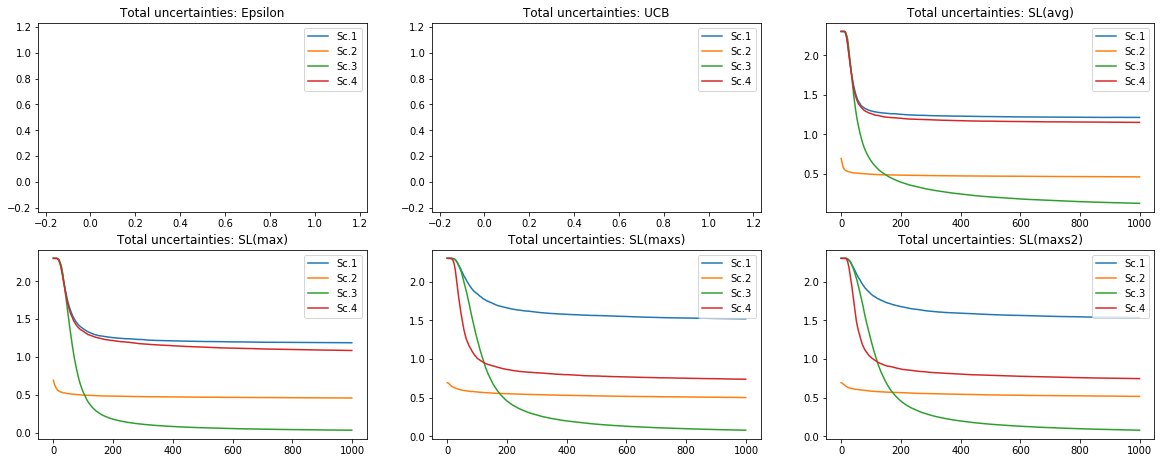

In [10]:
plt.figure(figsize=(20,16))

for j in range(n_agents):
    plt.subplot(4,3,j+1)
    for i in range(n_settings):
        plt.plot(np.arange(n_episodes),np.sum(totuncertainties[i,j,:,:],axis=0)/np.float(n_trials), label=label_settings[i])
    plt.legend()
    plt.title('Total uncertainties: {0}'.format(label_agents[j]))

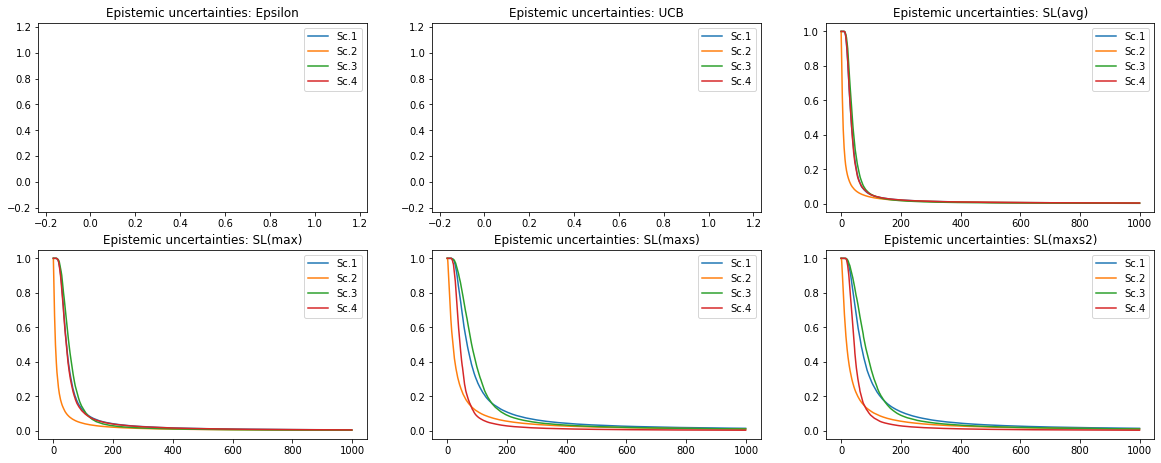

In [11]:
plt.figure(figsize=(20,16))

for j in range(n_agents):
    plt.subplot(4,3,j+1)
    for i in range(n_settings):
        plt.plot(np.arange(n_episodes),np.sum(epuncertainties[i,j,:,:],axis=0)/np.float(n_trials), label=label_settings[i])
    plt.legend()
    plt.title('Epistemic uncertainties: {0}'.format(label_agents[j]))